In [287]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [288]:
df = pd.read_csv("data/1.32.csv")

## Settings

In [289]:
percentageBarGraphMode = False
barGraphMode = False
percentageDefaultGraphMode = True
defaultGraphMode = False

## Generic Treatment

Generic graph treatment

In [290]:

#percentageFormat = "3.2f"

def innerGenericTreatment( table, graphKind, xlabel, ylabel, isXPercentage=False, isYPercentage=False, xTotalCount=0, yTotalCount=0 ):
        
    if graphKind is None:
        ax = table.plot()
    else:
        ax = table.plot(kind=graphKind)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend('') 
    
    if isXPercentage:
        xvals = ax.get_xticks()
        ax.set_xticklabels(['{:3.0f}%'.format((x*100)/(xTotalCount-1)) for x in xvals])
        
    if isYPercentage: 
        yvals = ax.get_yticks()
        ax.set_yticklabels(['{:3.0f}%'.format((y*100)/(yTotalCount)) for y in yvals])
#        ax.set_yticklabels(['{:3.0f}%'.format((y*100)/(yTotalCount-1)) for y in yvals])
    
    return

def genericTreatment( dataTable, xLabel, yLabel, xTotalCount=0, yTotalCount=0, isXPercentage=True, isYPercentage=False ):
    percentageXLabel = xLabel
    if isXPercentage:
        percentageXLabel = (percentageXLabel+" (%)")
    percentageYLabel = yLabel
    if isYPercentage:
        percentageYLabel = (percentageYLabel+" (%)")            
    if percentageBarGraphMode:
        innerGenericTreatment( dataTable, 'bar', percentageXLabel, percentageYLabel,
                         isXPercentage, isYPercentage, xTotalCount, yTotalCount )
    if barGraphMode:
        innerGenericTreatment( dataTable, 'bar', xLabel, yLabel)
    if percentageDefaultGraphMode:
        innerGenericTreatment( dataTable, None, percentageXLabel, percentageYLabel,
                         isXPercentage, isYPercentage, xTotalCount, yTotalCount )
    if defaultGraphMode:
        innerGenericTreatment( dataTable, None, xLabel, yLabel)


gameSessionCount=184
#death=229
mean#death=1.24456521739
#equip=241
mean#equip=1.3097826087
#craft=70
mean#craft=0.380434782609
#complete=11
mean#complete=0.0597826086957
#reach=406
mean#reach=2.20652173913


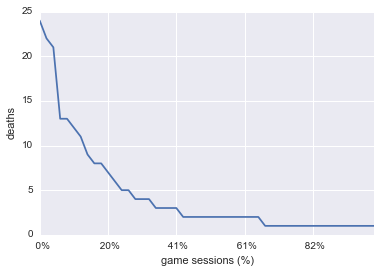

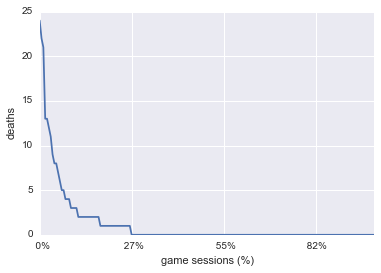

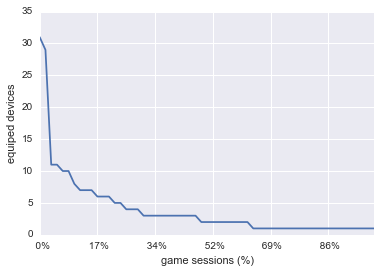

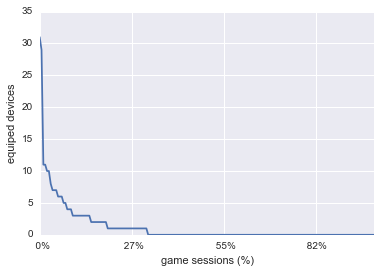

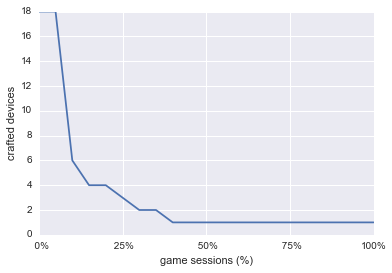

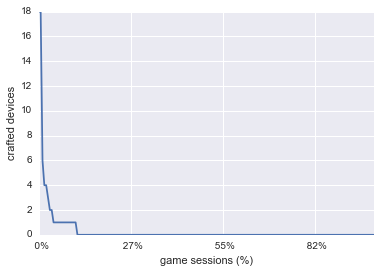

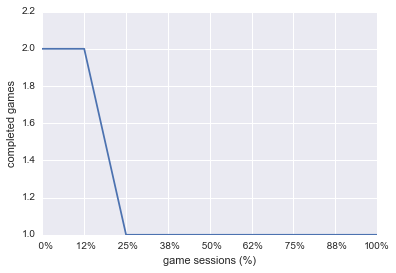

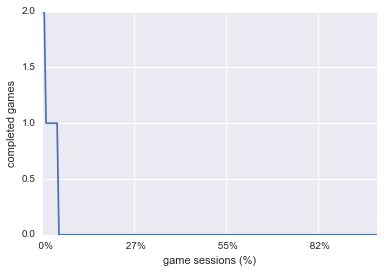

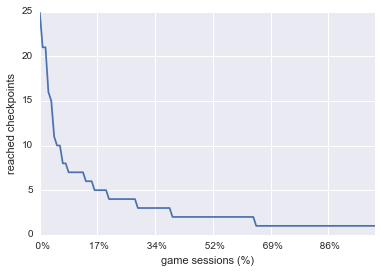

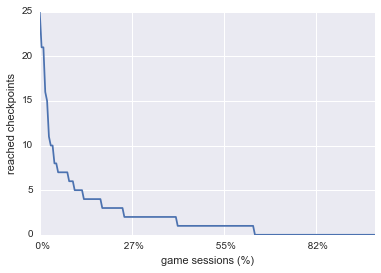

In [291]:
gameSessionCount = df["playerId"].nunique()
print 'gameSessionCount={0}'.format(gameSessionCount)

events = ['death', 'equip', 'craft', 'complete', 'reach']

graphLabels = pd.Series(['deaths','equiped devices','crafted devices','completed games','reached checkpoints'],index=events)

for event in events:
    studiedEvent = event    

    columnName = studiedEvent+"s"
    graphLabel = graphLabels[event]

    studiedEventCount = df[df["type"]==studiedEvent]["id"].count()
    print '#{0}={1}'.format(studiedEvent,studiedEventCount)
    mean = studiedEventCount / float(gameSessionCount)
    print 'mean#{0}={1}'.format(studiedEvent, mean)

    positiveGameSessions = df[df["type"]==studiedEvent]["playerId"].value_counts()

    positiveGameSessionCount = positiveGameSessions.count()
    positiveGameSessionCountTable = pd.DataFrame({columnName: positiveGameSessions.values})

    
    genericTreatment(positiveGameSessionCountTable, "game sessions", graphLabel,
                     positiveGameSessionCount)
    
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

    positiveGameSessionCountTable.describe()

    negativeGameSessionCountSeries = pd.Series(0, index=(list(range(positiveGameSessionCount,gameSessionCount-1))))
    negativeGameSessionCountTable = pd.DataFrame({columnName: negativeGameSessionCountSeries})

    fullEventGameSessionCountTable = pd.concat([positiveGameSessionCountTable, negativeGameSessionCountTable]) 

    genericTreatment(fullEventGameSessionCountTable, "game sessions", graphLabel,
                     gameSessionCount)
    

    fullEventGameSessionCountTable.describe()
    

## Specific Treatment
### Events

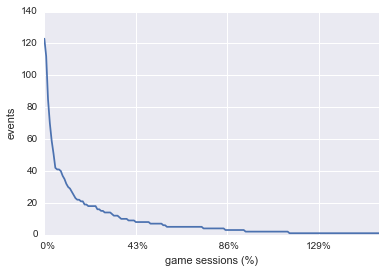

In [292]:
eventstable = pd.DataFrame({"events" : df["playerId"].value_counts().values})

eventsLabel = "events"

genericTreatment(eventstable, "game sessions", eventsLabel, positiveGameSessionCount )

### Checkpoints


checkpoints=
Checkpoint00      0
Checkpoint01    171
Checkpoint02     80
Checkpoint03     31
Checkpoint04     23
Checkpoint05     23
Checkpoint06     26
Checkpoint07     23
Checkpoint08     29
Name: section, dtype: int64

totalCheckpointsCount=406

reachedGameSessionCount=117

neverReachedGameSessionCount=67

fullCheckpointsTable=
   checkpoints
0          184
1          171
2           80
3           31
4           23
5           23
6           26
7           23
8           29

maxCheckpointCounts=
Checkpoint00     0
Checkpoint01    47
Checkpoint02    29
Checkpoint03     4
Checkpoint04     5
Checkpoint05     2
Checkpoint06     3
Checkpoint07     7
Checkpoint08    20
Name: maxCheckpoint, dtype: int64

fullMaxCheckpointCountsTable=
   fullMaxCheckpoint
0                 67
1                 47
2                 29
3                  4
4                  5
5                  2
6                  3
7                  7
8                 20


,fullMaxCheckpoint
count,9.000000
mean,20.444444
std,23.130667
min,2.000000
25%,4.000000
50%,7.000000
75%,29.000000
max,67.000000


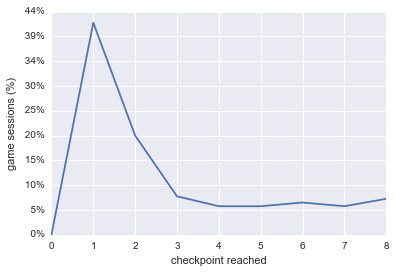

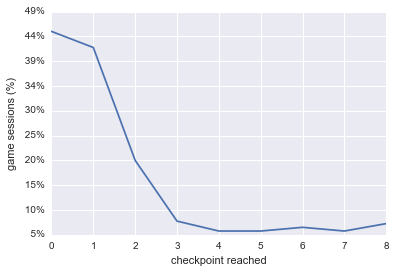

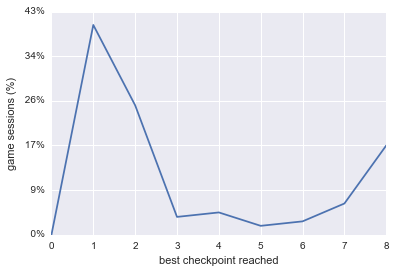

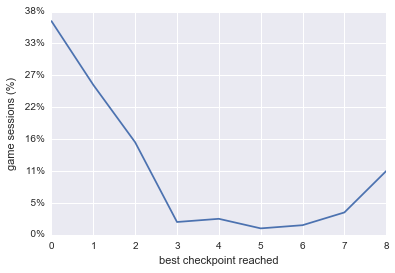

In [295]:
checkpoints = df[df["type"]=="reach"]["section"].value_counts()
checkpoints['Checkpoint00'] = 0
checkpoints = checkpoints.sort_index()
totalCheckpointsCount = checkpoints.sum()
print '\ncheckpoints=\n{0}'.format(checkpoints)
print '\ntotalCheckpointsCount={0}'.format(totalCheckpointsCount)


reachedGameSessions = df[df["type"]=="reach"]["playerId"].value_counts()
reachedGameSessionCount = reachedGameSessions.count()
print '\nreachedGameSessionCount={0}'.format(reachedGameSessionCount)
neverReachedGameSessionCount = gameSessionCount - reachedGameSessionCount
print '\nneverReachedGameSessionCount={0}'.format(neverReachedGameSessionCount)

checkpointstable = pd.DataFrame({"checkpoints" : checkpoints.values})
#reachedGameSessionCount
genericTreatment( checkpointstable, "checkpoint reached", "game sessions", 0, totalCheckpointsCount, False, True )


fullCheckpointsTable = checkpointstable
fullCheckpointsTable['checkpoints'][0] = gameSessionCount
print '\nfullCheckpointsTable=\n{0}'.format(fullCheckpointsTable)
#gameSessionCount
genericTreatment( fullCheckpointsTable, "checkpoint reached", "game sessions", 0, totalCheckpointsCount, False, True )


checkpointsByGameSession = df[df["type"]=="reach"].loc[:,['section','playerId']]
grouped = checkpointsByGameSession.groupby("playerId")
maxCheckpointWithIDs = grouped.max()
maxCheckpointWithIDs.head()

maxCheckpointTable = pd.DataFrame({"maxCheckpoint" : maxCheckpointWithIDs.values.flatten()})
maxCheckpointCounts = maxCheckpointTable["maxCheckpoint"].value_counts()
maxCheckpointCounts['Checkpoint00'] = 0
maxCheckpointCounts = maxCheckpointCounts.sort_index()
print '\nmaxCheckpointCounts=\n{0}'.format(maxCheckpointCounts)

maxCheckpointCountsTable = pd.DataFrame({"maxCheckpoint" : maxCheckpointCounts.values})
genericTreatment( maxCheckpointCountsTable, "best checkpoint reached", "game sessions", 0, reachedGameSessionCount, False, True )
maxCheckpointCountsTable.describe()

fullMaxCheckpointCounts = maxCheckpointCounts
fullMaxCheckpointCounts['Checkpoint00'] = neverReachedGameSessionCount
fullMaxCheckpointCountsTable = pd.DataFrame({"fullMaxCheckpoint" : fullMaxCheckpointCounts.values})

genericTreatment( fullMaxCheckpointCountsTable, "best checkpoint reached", "game sessions", 0, gameSessionCount, False, True )

print '\nfullMaxCheckpointCountsTable=\n{0}'.format(fullMaxCheckpointCountsTable)
fullMaxCheckpointCountsTable.describe()